# S&P 500 Technical Analysis Reseach
is a trading discipline employed to evaluate investments and identify trading opportunities in price trends and patterns seen on charts. Technical analysts believe past trading activity and price changes of a security can be valuable indicators of the security's future price movements

##### Disclosure: Technical should not be taken as a recommendation to buy or sell any security, this is not financial advise. This is purely perspective research only, using computational finance trading strategies for stock performances throughout different time series.  Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance data package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
SP500_Analysis = pd.read_csv("SP500_Analysis.csv", index_col= "Date", parse_dates= ["Date"])

In [3]:
SP500_Analysis.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [4]:
SP500_Analysis.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000
2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000
2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000
2020-09-04,3453.600098,3479.149902,3349.629883,3426.959961,3426.959961,4431440000
2020-09-08,3371.879883,3379.969971,3329.270020,3331.840088,3331.840088,4665600000


We will be using the close data to conduct technical analysis

In [5]:
SP500_Analysis = SP500_Analysis.Close.to_frame()

Using the SMA(Simple Moving Average) 50 represents 50 trading days 

In [6]:
SP500_Analysis["SMA50"] = SP500_Analysis.Close.rolling(window = 50).mean()

In [7]:
SP500_Analysis.tail()

,Close,SMA50
Date,,
2020-09-01,3526.649902,3274.962812
2020-09-02,3580.840088,3283.953813
2020-09-03,3455.060059,3292.048413
2020-09-04,3426.959961,3298.912412
2020-09-08,3331.840088,3305.368213


Now to include the SMA 200 to represent 200 trading days for comparison to the SMA 50

In [8]:
SP500_Analysis["SMA200"] = SP500_Analysis.Close.rolling(window = 200).mean()

In [9]:
SP500_Analysis.tail()

,Close,SMA50,SMA200
Date,,,
2020-09-01,3526.649902,3274.962812,3087.228646
2020-09-02,3580.840088,3283.953813,3089.530547
2020-09-03,3455.060059,3292.048413,3091.195697
2020-09-04,3426.959961,3298.912412,3092.729597
2020-09-08,3331.840088,3305.368213,3093.846498


now to visualzie the data within the past 5 years performance of the S&P 500

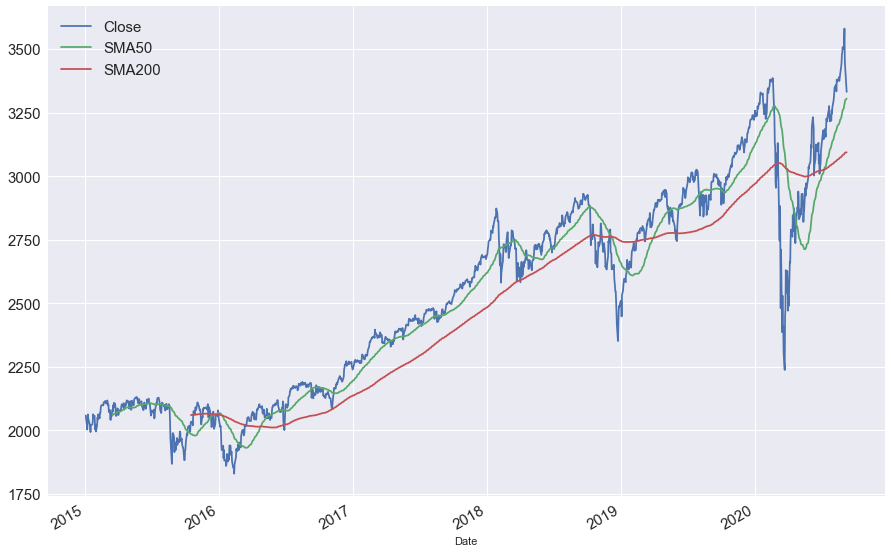

In [10]:
SP500_Analysis.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

SMA Trading analysis: When the SMA 50 is above the SMA 200 that is a bullish buy/hold sign. However, when the SMA 200 is above the SMA 50, that’s a bearish/sell sign with regards to trading analysis. However, value investors could use these indicators to open new long term positions. Whenever investors notice the SMA 200 is crossing above the SMA 50, that could be a sign for them to buy more shares of that long term stock, hence "buying the dip". Depending on your investment strategy long term or short term, technical analysis indications is useful for both strategies.

Finding the Return vs Risk monthly horizon of the S&P 500 

In [11]:
SP500_Analysis_m = SP500_Analysis.Close.resample("M", kind = "period").last().to_frame()

In [12]:
SP500_Analysis_m.head()

,Close
Date,
2015-01,1994.989990
2015-02,2104.500000
2015-03,2067.889893
2015-04,2085.510010
2015-05,2107.389893


In [13]:
SP500_Analysis_m["Return"] = SP500_Analysis_m.pct_change()

In [14]:
SP500_Analysis_m.head()

,Close,Return
Date,,
2015-01,1994.989990,NaN
2015-02,2104.500000,0.054893
2015-03,2067.889893,-0.017396
2015-04,2085.510010,0.008521
2015-05,2107.389893,0.010491


Return and Risk of the S&P 500 within the past 5 years, we will be using 20 to determine how well the S&P 500 performned within a 20 month time frame

In [15]:
SP500_Analysis_m["Roll_Return"] = SP500_Analysis_m.Return.rolling(20).mean()

In [16]:
SP500_Analysis_m.tail()

,Close,Return,Roll_Return
Date,,,
2020-05,3044.310059,0.045282,0.004102
2020-06,3100.290039,0.018388,0.008491
2020-07,3271.120117,0.055101,0.010354
2020-08,3500.310059,0.070065,0.018446
2020-09,3331.840088,-0.048130,0.012105


In [17]:
SP500_Analysis_m["Roll_Risk"] = SP500_Analysis_m.Return.rolling(20).std()

In [18]:
SP500_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,3044.310059,0.045282,0.004102,0.062955
2020-06,3100.290039,0.018388,0.008491,0.060576
2020-07,3271.120117,0.055101,0.010354,0.061445
2020-08,3500.310059,0.070065,0.018446,0.057838
2020-09,3331.840088,-0.048130,0.012105,0.057838


Annualizing the data

In [19]:
SP500_Analysis_m["Roll_Return"] = SP500_Analysis_m["Roll_Return"] * 12
SP500_Analysis_m["Roll_Risk"] = SP500_Analysis_m["Roll_Risk"] * np.sqrt(12)

In [20]:
SP500_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,3044.310059,0.045282,0.049222,0.218082
2020-06,3100.290039,0.018388,0.101897,0.209840
2020-07,3271.120117,0.055101,0.124242,0.212851
2020-08,3500.310059,0.070065,0.221347,0.200356
2020-09,3331.840088,-0.048130,0.145259,0.200356


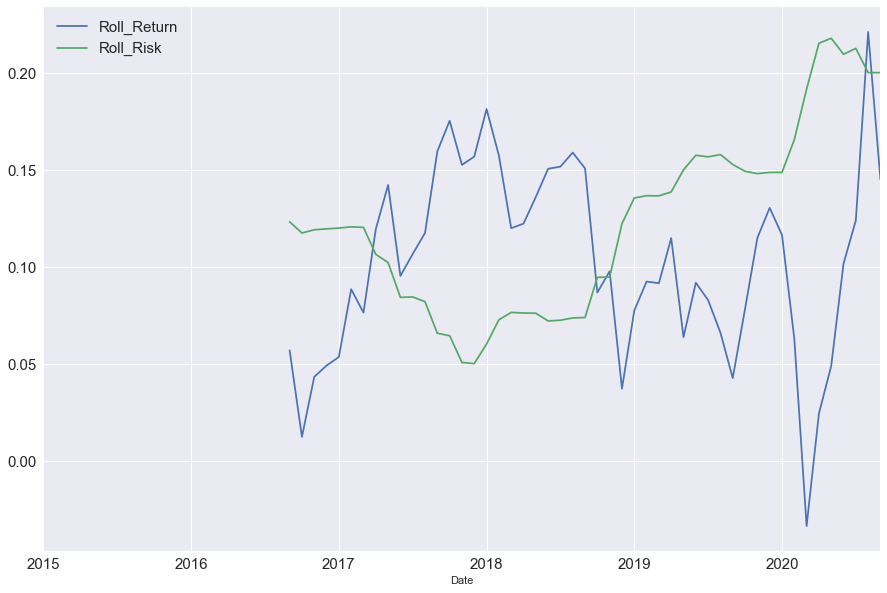

In [21]:
SP500_Analysis_m.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

Analysis of the Return vs Risk time frame: During large declines in returns we can notice the risk rises while when return rises, risk tends to decrease.